In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering


### Generate Synthetic Customer Data

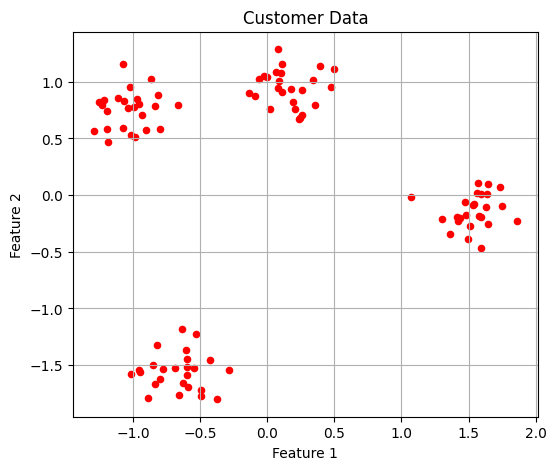

In [4]:
X, _ = make_blobs(n_samples=100, centers=4, cluster_std=1.0, random_state=42)

# Standardize the data for better results
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the data
plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c = 'red', s = 20)
plt.title('Customer Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

### Create a Dendrogram to Visualize the Hierarchy

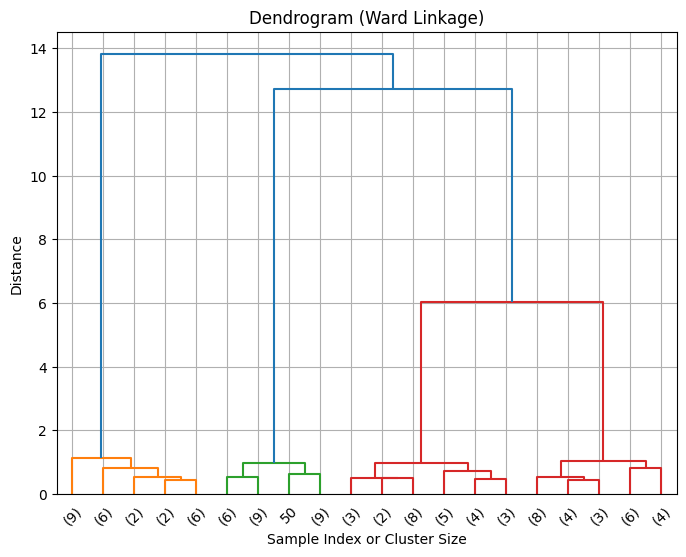

In [5]:
Z = linkage(X_scaled, method = 'ward')

# plot dendogram
plt.figure(figsize = (8,6))
dendrogram(Z, truncate_mode='lastp', p = 20, leaf_rotation=45, leaf_font_size=10)
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

### Perform Agglomerative Clustering

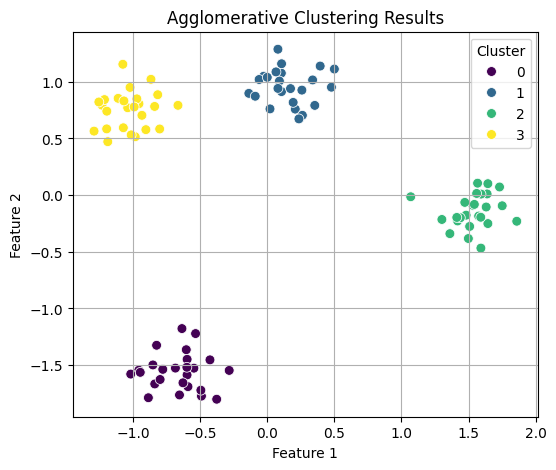

In [6]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = agg_clustering.fit_predict(X_scaled)

# visualize the clusters
plt.figure(figsize = (6,5))
sns.scatterplot(x = X_scaled[:, 0], y = X_scaled[:,1], hue = labels, palette='viridis', s = 50)
plt.title('Agglomerative Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Flexible Clustering Using Dendrogram Cut

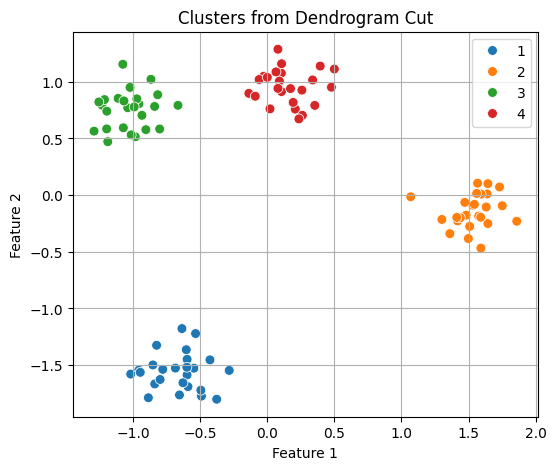

In [7]:
# cut the dendogram to form 4 clusters
cut_labels = fcluster(Z, t = 4, criterion='maxclust')

# visualize the clusters
plt.figure(figsize = (6,5))
sns.scatterplot(x = X_scaled[:,0], y = X_scaled[:,1], hue = cut_labels, palette='tab10', s = 50)
plt.title('Clusters from Dendrogram Cut')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()